In [ ]:
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, glob

In [ ]:
import os

def resize_images(img_path):
  images=glob.glob(img_path + "/*.jpg")
  
  print(len(images), "images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
  target_size=(28,28)
  for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

  print(len(images), " images resized.")

# 가우; 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/Aiffel/Exploration/rock_paper_scissors/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100 images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [ ]:
resize_images('/content/drive/MyDrive/Aiffel/Exploration/rock_paper_scissors/rock')

100 images to be resized.
100  images resized.


In [ ]:
resize_images('/content/drive/MyDrive/Aiffel/Exploration/rock_paper_scissors/Paper')

100 images to be resized.
100  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=300):
  # 가위 : 0, 바위 : 1, 보 : 2
  img_size=28
  color=3
  # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
  imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
  labels=np.zeros(number_of_data, dtype=np.int32)

  idx=0
  for file in glob.iglob(img_path + '/scissor/*.jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx, :, :, :]=img   #데이터 영역에 이미지 행렬을 복사
    idx = idx + 1   # 가위 : 0

  for file in glob.iglob(img_path + '/rock/*.jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx, :, :, :,]=img   # 데이터 영역에 이미지 행렬을 복사
    labels[idx]=1   # 바위 : 1
    idx = idx + 1

  for file in glob.iglob(img_path + '/Paper/*.jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx, :, :, :]=img   # 데이터 영역에 이미지 행렬을 복사
    labels[idx]=2   # 보 : 2
    idx = idx + 1
    
  print("학습 데이터(x_train)의 이미지 개수는", idx, "입니다.")
  return imgs, labels

image_dir_path = "/content/drive/MyDrive/Aiffel/Exploration/rock_paper_scissors"
(x_train, x_test) = load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))


학습 데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
x_test shape: (300,)


라벨:  0


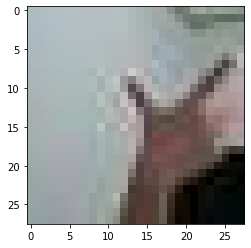

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', x_test[0])

In [ ]:
# 모델을 직접 만들어 보세요.

import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

In [ ]:
# 딥러닝 네트워크 학습시키기

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, x_test, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 19ms/step - loss: 19.3430 - accuracy: 0.3267
Epoch 2/10
10/10 [==============================] - 0s 19ms/step - loss: 4.7687 - accuracy: 0.5300
Epoch 3/10
10/10 [==============================] - 0s 18ms/step - loss: 1.5607 - accuracy: 0.7767
Epoch 4/10
10/10 [==============================] - 0s 17ms/step - loss: 0.3130 - accuracy: 0.9233
Epoch 5/10
10/10 [==============================] - 0s 21ms/step - loss: 0.1371 - accuracy: 0.9633
Epoch 6/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0557 - accuracy: 0.9767
Epoch 7/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0375 - accuracy: 0.9833
Epoch 8/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0281 - accuracy: 0.9833
Epoch 9/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0162 - accuracy: 0.9933
Epoch 10/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0115 - accuracy: 1.0000


## 얼마나 잘 만들었는지 확인하기(테스트)

In [ ]:
import os

def resize_images(img_path):
  images=glob.glob(img_path + "/*.jpg")
  
  print(len(images), "images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
  target_size=(28,28)
  for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

  print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/Aiffel/Exploration/rock_paper_scissors/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100 images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [ ]:
# test 데이터셋 이미지 만들기

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(y_tarin)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/Aiffel/Exploration/rock_paper_scissors/testdataset"
(y_train, y_test)=load_data(image_dir_path)
y_train_norm = y_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(y_tarin)의 이미지 개수는 300 입니다.
y_train shape: (300, 28, 28, 3)
y_test shape: (300,)


In [ ]:
img_path = "/content/drive/MyDrive/Aiffel/Exploration/rock_paper_scissors/testdataset/rock-samples"
resize_images(img_path)

100 images to be resized.
100  images resized.


In [ ]:
img_path = "/content/drive/MyDrive/Aiffel/Exploration/rock_paper_scissors/testdataset/scissors-samples"
resize_images(img_path)

100 images to be resized.
100  images resized.


In [ ]:
img_path = "/content/drive/MyDrive/Aiffel/Exploration/rock_paper_scissors/testdataset/paper-samples"
resize_images(img_path)

100 images to be resized.
100  images resized.


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 8.4407 - accuracy: 0.2000
test_loss: 8.440749168395996 
test_accuracy: 0.20000000298023224
